In [50]:
import pandas as pd
import re
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [51]:
# Load the data
age_analysis_df = pd.read_excel('Data/Age Analysis.xlsx')

csv_folder = os.path.join(os.getcwd(), "csv_outputs")
json_folder = os.path.join(os.getcwd(), "json_outputs")

In [52]:
print("Columns:", age_analysis_df.columns.tolist())

Columns: ['CUSTOMER_NUMBER', 'FIN_PERIOD', 'TOTAL_DUE', 'AMT_CURRENT', 'AMT_30_DAYS', 'AMT_60_DAYS', 'AMT_90_DAYS', 'AMT_120_DAYS', 'AMT_150_DAYS', 'AMT_180_DAYS', 'AMT_210_DAYS', 'AMT_240_DAYS', 'AMT_270_DAYS', 'AMT_300_DAYS', 'AMT_330_DAYS', 'AMT_360_DAYS']


In [53]:
print("Sample data:\n", age_analysis_df.head())

Sample data:
   CUSTOMER_NUMBER  FIN_PERIOD  TOTAL_DUE  AMT_CURRENT  AMT_30_DAYS  \
0          AACJ01      201810     456.00       456.00          0.0   
1          AACJ01      201811     456.00         0.00        456.0   
2          AACJ01      201812     456.00         0.00          0.0   
3          AACJ01      201901     456.00         0.00          0.0   
4          AACJ01      201902     463.32         7.32          0.0   

   AMT_60_DAYS  AMT_90_DAYS  AMT_120_DAYS  AMT_150_DAYS  AMT_180_DAYS  \
0          0.0          0.0           0.0           0.0             0   
1          0.0          0.0           0.0           0.0             0   
2        456.0          0.0           0.0           0.0             0   
3          0.0        456.0           0.0           0.0             0   
4          0.0          0.0         456.0           0.0             0   

   AMT_210_DAYS  AMT_240_DAYS  AMT_270_DAYS  AMT_300_DAYS  AMT_330_DAYS  \
0             0             0             0        

In [54]:
print("Null values:\n", age_analysis_df.isnull().sum())

Null values:
 CUSTOMER_NUMBER    0
FIN_PERIOD         0
TOTAL_DUE          0
AMT_CURRENT        0
AMT_30_DAYS        0
AMT_60_DAYS        0
AMT_90_DAYS        0
AMT_120_DAYS       0
AMT_150_DAYS       0
AMT_180_DAYS       0
AMT_210_DAYS       0
AMT_240_DAYS       0
AMT_270_DAYS       0
AMT_300_DAYS       0
AMT_330_DAYS       0
AMT_360_DAYS       0
dtype: int64


In [55]:
# Remove rows with any null values
customer_parameters_df = age_analysis_df.dropna()

In [56]:
print("Data shape:", age_analysis_df.shape)

Data shape: (21914, 16)


In [57]:
age_analysis_df

,CUSTOMER_NUMBER,FIN_PERIOD,TOTAL_DUE,AMT_CURRENT,AMT_30_DAYS,AMT_60_DAYS,AMT_90_DAYS,AMT_120_DAYS,AMT_150_DAYS,AMT_180_DAYS,AMT_210_DAYS,AMT_240_DAYS,AMT_270_DAYS,AMT_300_DAYS,AMT_330_DAYS,AMT_360_DAYS
0,AACJ01,201810,456.00,456.00,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0
1,AACJ01,201811,456.00,0.00,456.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0
2,AACJ01,201812,456.00,0.00,0.0,456.0,0.0,0.0,0.0,0,0,0,0,0,0,0
3,AACJ01,201901,456.00,0.00,0.0,0.0,456.0,0.0,0.0,0,0,0,0,0,0,0
4,AACJ01,201902,463.32,7.32,0.0,0.0,0.0,456.0,0.0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21909,ZNAO01,201908,-116.27,-116.27,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0
21910,ZNAO01,201909,1023.73,1023.73,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0
21911,ZNAO01,201910,672.60,672.60,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0
21912,ZNAO01,201911,172.60,0.00,172.6,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0


In [58]:
age_analysis_df['CUSTOMER_NUMBER'] = age_analysis_df['CUSTOMER_NUMBER'].astype(str).str.strip()

age_analysis_df['FIN_PERIOD'] = pd.to_datetime(age_analysis_df['FIN_PERIOD'], format='%Y%m')

amt_cols = [col for col in age_analysis_df.columns if 'AMT_' in col or 'TOTAL_DUE' in col]
age_analysis_df[amt_cols] = age_analysis_df[amt_cols].apply(pd.to_numeric, errors='coerce')

age_analysis_df['TOTAL_DUE'] = age_analysis_df[amt_cols].sum(axis=1)

In [59]:
#Create a dimension table for time based on the FIN_PERIOD column
min_period = pd.to_datetime(age_analysis_df['FIN_PERIOD'].min(), format='%Y%m')
max_period = pd.to_datetime(age_analysis_df['FIN_PERIOD'].max(), format='%Y%m')

dim_time = pd.DataFrame({
    'FIN_PERIOD': pd.date_range(start=min_period, end=max_period, freq='MS')
})
dim_time['YEAR'] = dim_time['FIN_PERIOD'].dt.year
dim_time['MONTH'] = dim_time['FIN_PERIOD'].dt.month
dim_time['MONTH_NAME'] = dim_time['FIN_PERIOD'].dt.strftime('%B')

dim_time

,FIN_PERIOD,YEAR,MONTH,MONTH_NAME
0,2018-03-01,2018,3,March
1,2018-04-01,2018,4,April
2,2018-05-01,2018,5,May
3,2018-06-01,2018,6,June
4,2018-07-01,2018,7,July
5,2018-08-01,2018,8,August
6,2018-09-01,2018,9,September
7,2018-10-01,2018,10,October
8,2018-11-01,2018,11,November
9,2018-12-01,2018,12,December


In [60]:
dim_time.to_json(os.path.join(json_folder, "dim_time.json"), orient="records", lines=True, date_format='iso')
dim_time.to_csv(os.path.join(csv_folder, "dim_time.csv"), index=False)

CUSTOMER SEGMENTATION AND GROUPING

In [61]:
#Group by customer number and financial period
customer_segment = age_analysis_df.groupby(['CUSTOMER_NUMBER', 'FIN_PERIOD'])[amt_cols].sum()

customer_segment

TOTAL_DUE  AMT_CURRENT  AMT_30_DAYS  AMT_60_DAYS  \
CUSTOMER_NUMBER FIN_PERIOD                                                     
'DGSOC          2018-03-01   12800.00         0.00          0.0          0.0   
                2018-04-01   12800.00         0.00          0.0          0.0   
AACJ01          2018-10-01     912.00       456.00          0.0          0.0   
                2018-11-01     912.00         0.00        456.0          0.0   
                2018-12-01     912.00         0.00          0.0        456.0   
...                               ...          ...          ...          ...   
ZNAO01          2019-08-01    -232.54      -116.27          0.0          0.0   
                2019-09-01    2047.46      1023.73          0.0          0.0   
                2019-10-01    1345.20       672.60          0.0          0.0   
                2019-11-01     345.20         0.00        172.6          0.0   
                2019-12-01     345.20         0.00          0.0        172.6   

                            AMT_90_DAYS  AMT_120_DAYS  AMT_150_DAYS  \
CUSTOMER_NUMBER FIN_PERIOD                                            
'DGSOC          2018-03-01          0.0        6400.0           0.0   
                2018-04-01          0.0           0.0        6400.0   
AACJ01          2018-10-01          0.0           0.0           0.0   
                2018-11-01          0.0           0.0           0.0   
                2018-12-01          0.0           0.0           0.0   
...                                 ...           ...           ...   
ZNAO01          2019-08-01          0.0           0.0           0.0   
                2019-09-01          0.0           0.0           0.0   
                2019-10-01          0.0           0.0           0.0   
                2019-11-01          0.0           0.0           0.0   
                2019-12-01          0.0           0.0           0.0   

                            AMT_180_DAYS  AMT_210_DAYS  AMT_240_DAYS  \
CUSTOMER_NUMBER FIN_PERIOD                                             
'DGSOC          2018-03-01             0             0             0   
                2018-04-01             0             0             0   
AACJ01          2018-10-01             0             0             0   
                2018-11-01             0             0             0   
                2018-12-01             0             0             0   
...                                  ...           ...           ...   
ZNAO01          2019-08-01             0             0             0   
                2019-09-01             0             0             0   
                2019-10-01             0             0             0   
                2019-11-01             0             0             0   
                2019-12-01             0             0             0   

                            AMT_270_DAYS  AMT_300_DAYS  AMT_330_DAYS  \
CUSTOMER_NUMBER FIN_PERIOD                                             
'DGSOC          2018-03-01             0             0             0   
                2018-04-01             0             0             0   
AACJ01          2018-10-01             0             0             0   
                2018-11-01             0             0             0   
                2018-12-01             0             0             0   
...                                  ...           ...           ...   
ZNAO01          2019-08-01             0             0             0   
                2019-09-01             0             0             0   
                2019-10-01             0             0             0   
                2019-11-01             0             0             0   
                2019-12-01             0             0             0   

                            AMT_360_DAYS  
CUSTOMER_NUMBER FIN_PERIOD                
'DGSOC          2018-03-01             0  
                2018-04-01             0  
AACJ01          2

In [62]:
customer_segment = customer_segment.reset_index()

In [63]:
customer_segment.to_json(os.path.join(json_folder, "customer_segment.json"), orient="records", lines=True, date_format='iso')
customer_segment.to_csv(os.path.join(csv_folder, "customer_segment.csv"), index=False)

In [64]:
#Pivot table by aging trends
age_pivot = age_analysis_df.pivot_table(index='FIN_PERIOD', values='TOTAL_DUE', aggfunc='sum')

age_pivot

,TOTAL_DUE
FIN_PERIOD,
2018-03-01,25778434.82
2018-04-01,25539527.66
2018-05-01,25114190.15
2018-06-01,23312131.38
2018-07-01,25880479.25
2018-08-01,26457203.29
2018-09-01,26332772.70
2018-10-01,24757652.79
2018-11-01,26742146.29


### Investigating Customer Variants

This section explores whether visually similar customer numbers (e.g., AACJ01 vs AACJC2) reflect sub-accounts, branches, or internal segmentation.

We extract prefixes and suffixes to identify potential groupings, then analyze whether customers sharing a prefix exhibit similar financial behavior across aging buckets.

This helps inform whether to roll up these variants in reporting or treat them as distinct entities.

In [65]:
# Create a copy
customer_number_df = age_analysis_df[['CUSTOMER_NUMBER']].drop_duplicates().copy()

# Extract patterns
customer_number_df['prefix'] = customer_number_df['CUSTOMER_NUMBER'].str.extract(r'^([A-Z]{1,4})')
customer_number_df['suffix'] = customer_number_df['CUSTOMER_NUMBER'].str.extract(r'(\d+)$')
customer_number_df['variant'] = customer_number_df['CUSTOMER_NUMBER'].str.extract(r'([A-Z]+\d+)$')

# Merge back to get financial metrics
merged_df = age_analysis_df.merge(customer_number_df, on='CUSTOMER_NUMBER', how='left')

# Group by prefix to explore behavioral similarity
grouped_metrics = merged_df.groupby('prefix')[amt_cols].mean().round(2)

grouped_metrics

,TOTAL_DUE,AMT_CURRENT,AMT_30_DAYS,AMT_60_DAYS,AMT_90_DAYS,AMT_120_DAYS,AMT_150_DAYS,AMT_180_DAYS,AMT_210_DAYS,AMT_240_DAYS,AMT_270_DAYS,AMT_300_DAYS,AMT_330_DAYS,AMT_360_DAYS
prefix,,,,,,,,,,,,,,
AACJ,18576.65,1943.25,1451.75,1451.26,1450.78,1450.29,1449.80,30.40,30.40,30.40,0.00,0.00,0.00,0.00
AADP,771738.34,20356.70,19870.65,18466.98,15363.47,23202.44,21523.49,19336.67,18989.60,18203.93,17228.87,16932.73,16798.33,159594.69
AAMI,1698.91,166.33,166.33,166.33,166.33,138.58,45.54,0.00,0.00,0.00,0.00,0.00,0.00,0.00
ABHG,1653.20,570.33,256.27,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
ABHN,392.85,157.18,38.13,1.11,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZDOE,1542.33,702.06,69.10,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
ZHAY,8577.63,1561.37,1111.96,888.77,306.53,396.89,23.30,0.00,0.00,0.00,0.00,0.00,0.00,0.00
ZMAU,4102.69,1676.81,374.53,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [66]:
#Flag potential variants

# Create a working copy
customer_number_var_df = customer_number_df.copy()

# Extract base code (first 4 letters)
customer_number_var_df['base_code'] = customer_number_var_df['CUSTOMER_NUMBER'].str.extract(r'^([A-Z]{4})')

# Flag potential variants based on shared base code
customer_number_var_df['is_variant'] = customer_number_var_df.duplicated('base_code', keep=False)

# Display result
customer_number_var_df

,CUSTOMER_NUMBER,prefix,suffix,variant,base_code,is_variant
0,AACJ01,AACJ,01,AACJ01,AACJ,True
9,AACJC2,AACJ,2,AACJC2,AACJ,True
15,AADPRG,AADP,NaN,NaN,AADP,True
37,AADPRO,AADP,NaN,NaN,AADP,True
60,AAMI01,AAMI,01,AAMI01,AAMI,False
...,...,...,...,...,...,...
21827,ZDOE01,ZDOE,01,ZDOE01,ZDOE,False
21840,ZHAY02,ZHAY,02,ZHAY02,ZHAY,False
21863,ZMAU01,ZMAU,01,ZMAU01,ZMAU,False
21869,ZNAE01,ZNAE,01,ZNAE01,ZNAE,False


### Overdue Ratio Calculation

This block calculates the total overdue amount for each customer-period row by summing all aging buckets beyond current. It then computes the `OVERDUE_RATIO` as a percentage of `TOTAL_DUE`.

This metric helps assess how much of a customer's balance is overdue, enabling risk profiling and payment behavior analysis at the row level.

In [67]:
age_analysis_df['OVERDUE_TOTAL'] = age_analysis_df[[
    'AMT_30_DAYS', 'AMT_60_DAYS', 'AMT_90_DAYS', 'AMT_120_DAYS',
    'AMT_150_DAYS', 'AMT_180_DAYS', 'AMT_210_DAYS', 'AMT_240_DAYS',
    'AMT_270_DAYS', 'AMT_300_DAYS', 'AMT_330_DAYS', 'AMT_360_DAYS'
]].sum(axis=1)

age_analysis_df['OVERDUE_RATIO'] = age_analysis_df['OVERDUE_TOTAL'] / age_analysis_df['TOTAL_DUE']
age_analysis_df[['CUSTOMER_NUMBER', 'FIN_PERIOD', 'TOTAL_DUE', 'OVERDUE_TOTAL', 'OVERDUE_RATIO']]

,CUSTOMER_NUMBER,FIN_PERIOD,TOTAL_DUE,OVERDUE_TOTAL,OVERDUE_RATIO
0,AACJ01,2018-10-01,912.00,0.0,0.0000
1,AACJ01,2018-11-01,912.00,456.0,0.5000
2,AACJ01,2018-12-01,912.00,456.0,0.5000
3,AACJ01,2019-01-01,912.00,456.0,0.5000
4,AACJ01,2019-02-01,926.64,456.0,0.4921
...,...,...,...,...,...
21909,ZNAO01,2019-08-01,-232.54,0.0,-0.0000
21910,ZNAO01,2019-09-01,2047.46,0.0,0.0000
21911,ZNAO01,2019-10-01,1345.20,0.0,0.0000
21912,ZNAO01,2019-11-01,345.20,172.6,0.5000


### Customer-Level Overdue Summary

This block aggregates `TOTAL_DUE` and `OVERDUE_TOTAL` across all periods per customer, then calculates their overall `OVERDUE_RATIO`.

This summary supports customer segmentation, risk scoring, and dashboard-level reporting. It shifts the analysis from row-level to entity-level.

In [68]:
customer_summary = age_analysis_df.groupby('CUSTOMER_NUMBER')[['TOTAL_DUE', 'OVERDUE_TOTAL']].sum()
customer_summary['OVERDUE_RATIO'] = customer_summary['OVERDUE_TOTAL'] / customer_summary['TOTAL_DUE']
customer_summary.reset_index()

,CUSTOMER_NUMBER,TOTAL_DUE,OVERDUE_TOTAL,OVERDUE_RATIO
0,'DGSOC,25600.00,12800.00,0.500000
1,AACJ01,8427.81,3721.19,0.441537
2,AACJC2,270222.00,106455.00,0.393954
3,AADPRG,8337250.28,3484301.30,0.417920
4,AADPRO,26390975.18,12963731.70,0.491218
...,...,...,...,...
1663,ZDOE01,20050.32,898.32,0.044803
1664,ZHAY02,197285.58,62731.28,0.317972
1665,ZMAU01,24616.12,2247.20,0.091290
1666,ZNAE01,1236115.39,505304.42,0.408784


### Due Amount Volatility

This block computes the standard deviation of `TOTAL_DUE` across periods for each customer.

High volatility may indicate erratic payment behavior, seasonal spikes, or inconsistent invoicing. It’s useful for identifying unstable accounts.

In [69]:
volatility_df = age_analysis_df.groupby('CUSTOMER_NUMBER')['TOTAL_DUE'].std().reset_index(name='DUE_VOLATILITY')
volatility_df

,CUSTOMER_NUMBER,DUE_VOLATILITY
0,'DGSOC,0.000000
1,AACJ01,28.395473
2,AACJC2,6013.497319
3,AADPRG,230861.022611
4,AADPRO,66303.524981
...,...,...
1663,ZDOE01,4160.937806
1664,ZHAY02,9128.714849
1665,ZMAU01,3645.619652
1666,ZNAE01,27394.025575


### Aging Bucket Totals

This block sums each aging bucket across the entire dataset and ranks them by total amount.

It reveals systemic payment delays — for example, if `AMT_120_DAYS` is consistently high, it may indicate a recurring issue in collections or customer behavior.

In [70]:
bucket_totals = age_analysis_df[[
    'AMT_CURRENT', 'AMT_30_DAYS', 'AMT_60_DAYS', 'AMT_90_DAYS',
    'AMT_120_DAYS', 'AMT_150_DAYS', 'AMT_180_DAYS', 'AMT_210_DAYS',
    'AMT_240_DAYS', 'AMT_270_DAYS', 'AMT_300_DAYS', 'AMT_330_DAYS',
    'AMT_360_DAYS'
]].sum().sort_values(ascending=False)

bucket_totals.to_frame(name='Total_Amount')

,Total_Amount
AMT_360_DAYS,44133518.00
AMT_30_DAYS,36365094.55
AMT_60_DAYS,29314784.02
AMT_CURRENT,25845289.31
AMT_90_DAYS,22663265.86
AMT_120_DAYS,21349842.75
AMT_150_DAYS,18259449.07
AMT_180_DAYS,15688664.00
AMT_210_DAYS,13438528.00
AMT_240_DAYS,10904014.00


### Negative Balance Detection

This block filters rows where `TOTAL_DUE` is negative, which may indicate refunds, reversals, or data entry errors.

Flagging these rows is essential for audit integrity and downstream calculations. Negative balances can distort overdue ratios and risk scores.

In [71]:
negative_due_df = age_analysis_df[age_analysis_df['TOTAL_DUE'] < 0]
negative_due_df[['CUSTOMER_NUMBER', 'FIN_PERIOD', 'TOTAL_DUE']]

,CUSTOMER_NUMBER,FIN_PERIOD,TOTAL_DUE
84,ABHN01,2019-04-01,-1641.60
85,ABHN01,2019-05-01,-1641.60
86,ABHN01,2019-06-01,-1641.60
87,ABHN01,2019-07-01,-1641.60
88,ABHN01,2019-08-01,-1641.60
...,...,...,...
21903,ZNAO01,2019-02-01,-1.54
21904,ZNAO01,2019-03-01,-1.54
21907,ZNAO01,2019-06-01,-232.54
21908,ZNAO01,2019-07-01,-232.54


## VISUALIZATION

### Overdue Ratio Distribution

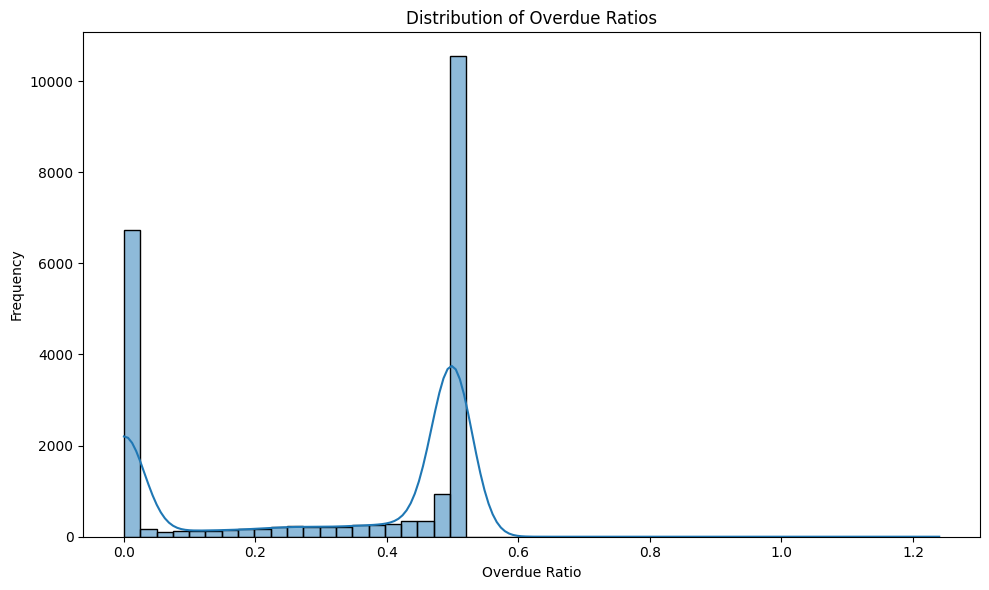

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(age_analysis_df['OVERDUE_RATIO'], bins=50, kde=True)
plt.title('Distribution of Overdue Ratios')
plt.xlabel('Overdue Ratio')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

### Bucket Totals Bar Chart

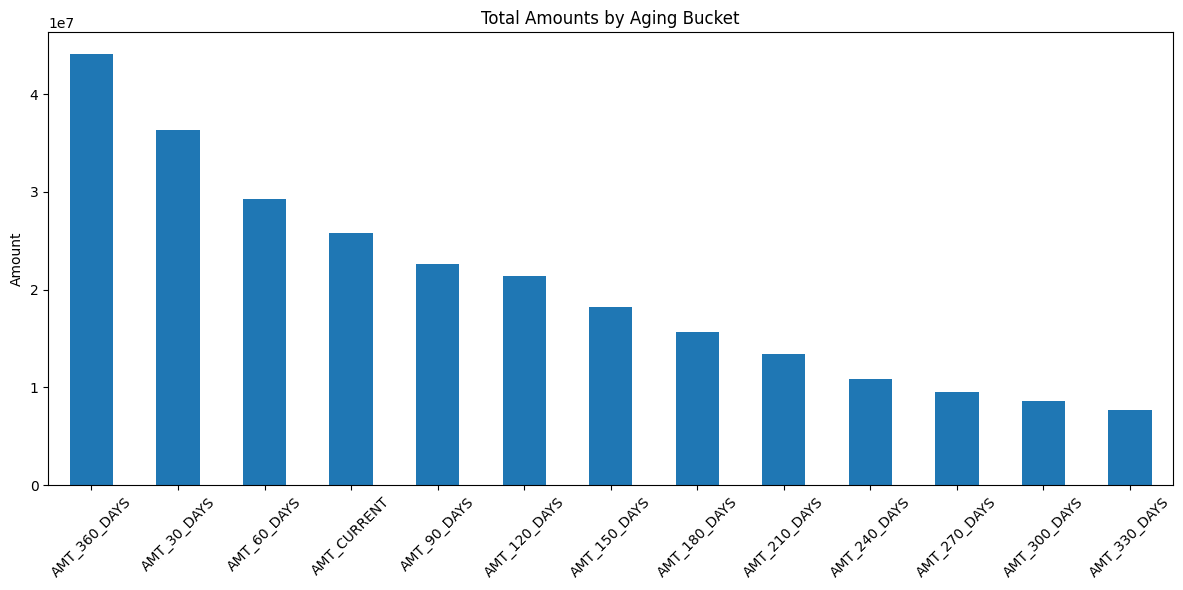

In [73]:
plt.figure(figsize=(12, 6))
bucket_totals.plot(kind='bar')
plt.title('Total Amounts by Aging Bucket')
plt.ylabel('Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [74]:
age_analysis_df.to_csv(os.path.join(csv_folder, "age_analysis_clean.csv"), index=False)
age_analysis_df.to_json(os.path.join(json_folder, "age_analysis_clean.json"), orient="records", lines=True)